In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

# Basic exploration
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Select features for clustering (Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(f"\nClustering features shape: {X.shape}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Dataset shape: (200, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First few rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                    

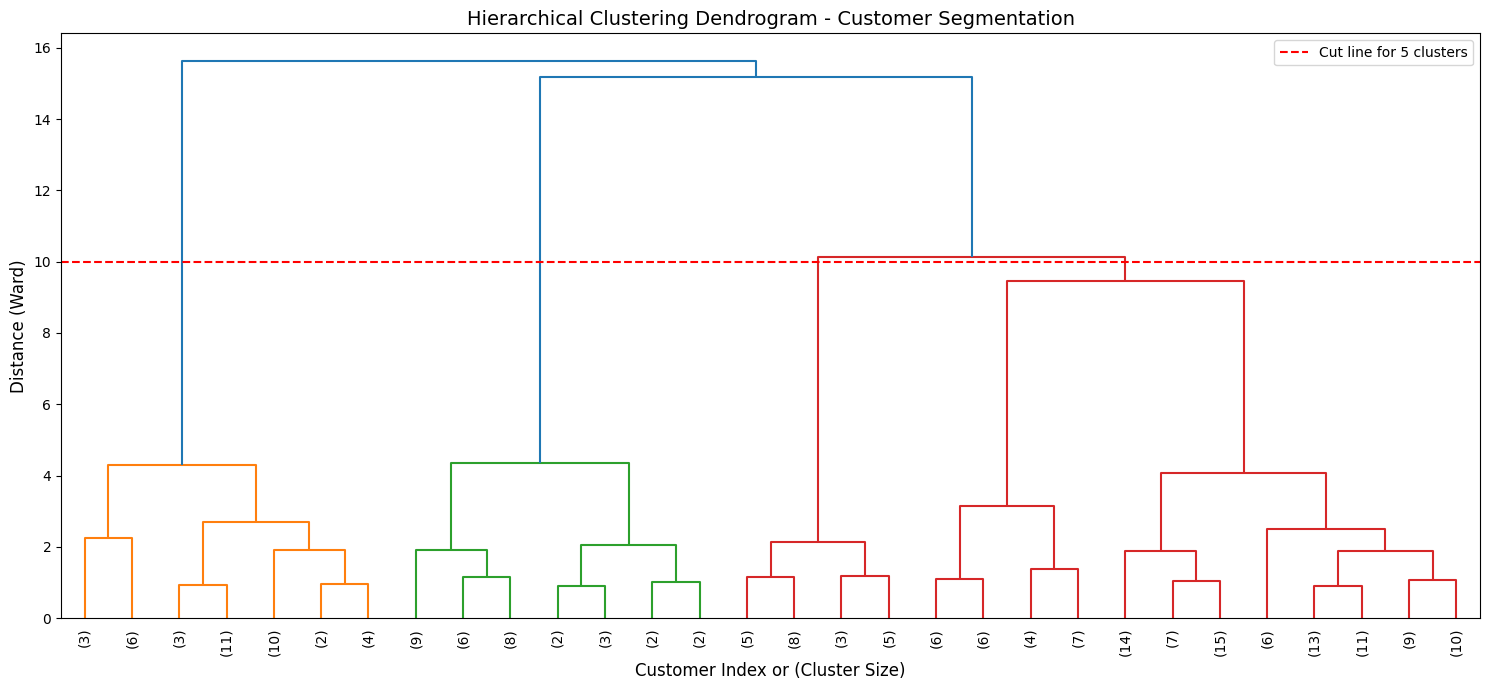

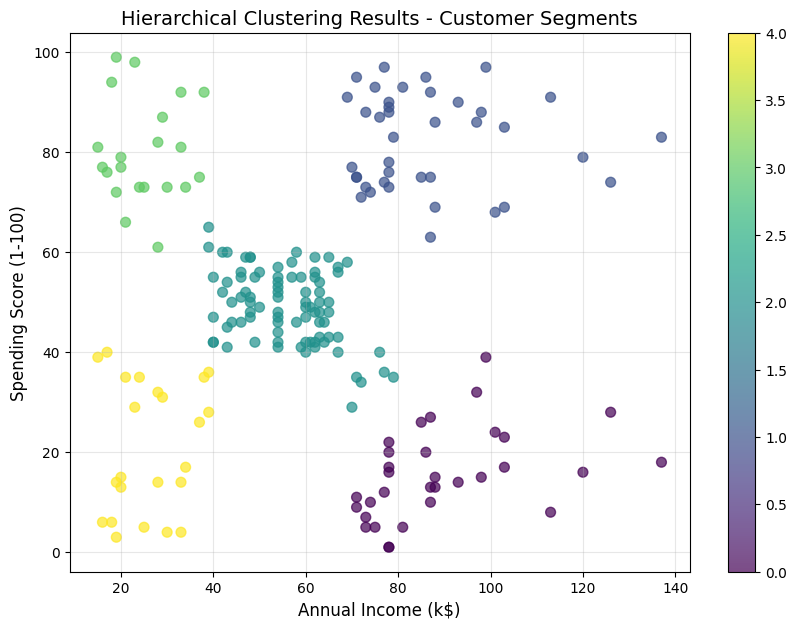

Hierarchical clustering - Silhouette Score: 0.554


In [8]:
# Hierarchical clustering analysis
linkage_matrix = linkage(X_scaled, method='ward')

# Create dendrogram to visualize agglomeration schedule
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix,
           truncate_mode='lastp',
           p=30,  # Show last 30 merges
           leaf_rotation=90,
           leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram - Customer Segmentation', fontsize=14)
plt.xlabel('Customer Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
plt.axhline(y=10, color='r', linestyle='--', label='Cut line for 5 clusters')
plt.legend()
plt.tight_layout()
plt.show()

# Apply hierarchical clustering with 5 clusters
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Visualize hierarchical clustering results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['Annual Income (k$)'],
                     df['Spending Score (1-100)'],
                     c=hierarchical_labels,
                     cmap='viridis',
                     s=50,
                     alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Hierarchical Clustering Results - Customer Segments', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Hierarchical clustering - Silhouette Score: {silhouette_score(X_scaled, hierarchical_labels):.3f}")

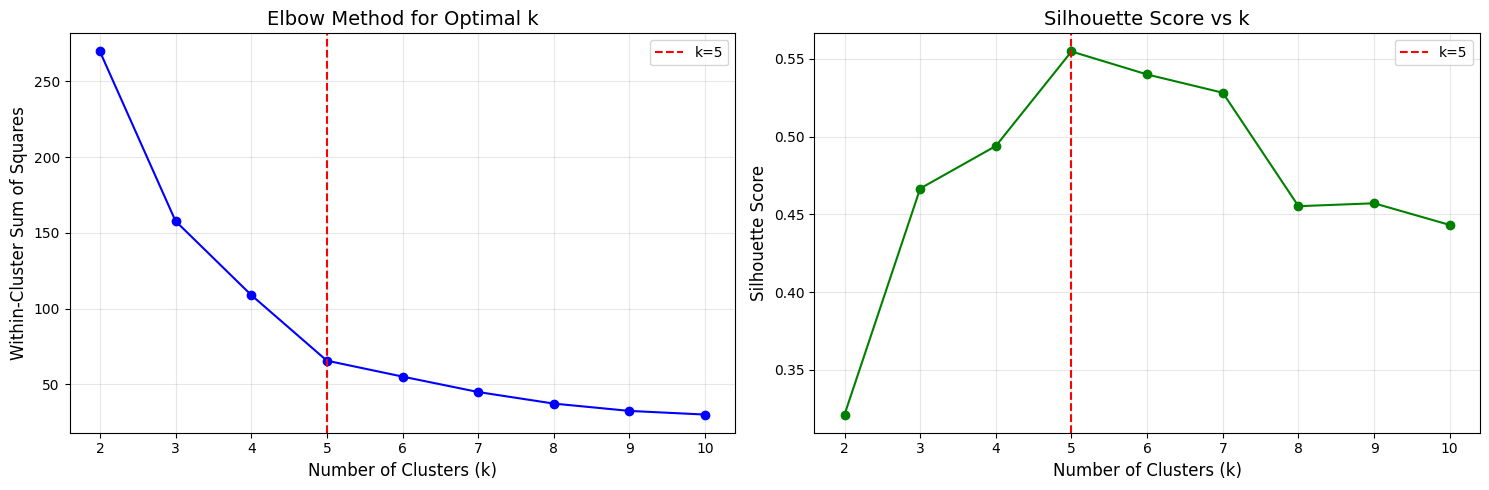

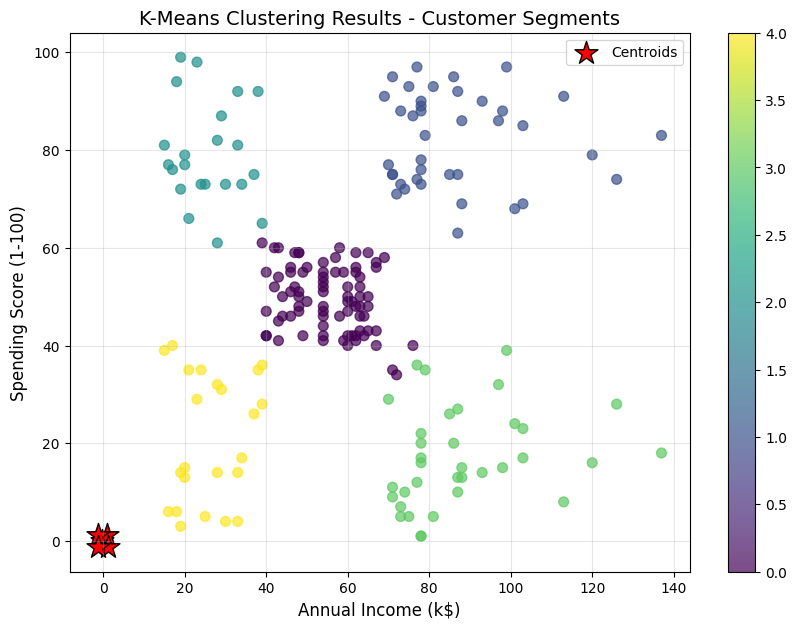

K-means clustering - Silhouette Score: 0.555
K-means converged in 4 iterations


In [9]:
# Determine optimal k using elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans_temp.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Within-Cluster Sum of Squares', fontsize=12)
ax1.set_title('Elbow Method for Optimal k', fontsize=14)
ax1.axvline(x=5, color='r', linestyle='--', label='k=5')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores, 'go-')
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score vs k', fontsize=14)
ax2.axvline(x=5, color='r', linestyle='--', label='k=5')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Apply K-means with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize K-means results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['Annual Income (k$)'],
                     df['Spending Score (1-100)'],
                     c=kmeans_labels,
                     cmap='viridis',
                     s=50,
                     alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           c='red',
           marker='*',
           s=300,
           edgecolors='black',
           label='Centroids')
plt.colorbar(scatter)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('K-Means Clustering Results - Customer Segments', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"K-means clustering - Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.3f}")
print(f"K-means converged in {kmeans.n_iter_} iterations")

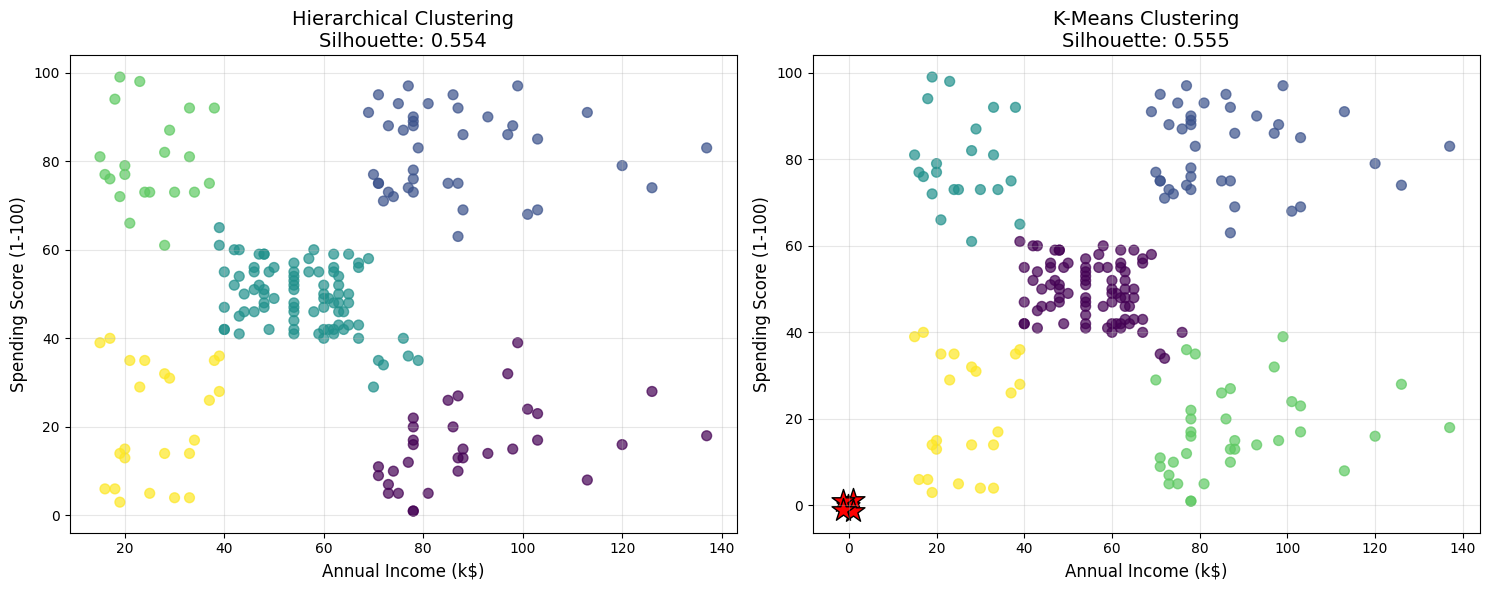


Cluster 0 characteristics:
  Size: 81 customers
  Avg Income: $55.3k
  Avg Spending Score: 49.5

Cluster 1 characteristics:
  Size: 39 customers
  Avg Income: $86.5k
  Avg Spending Score: 82.1

Cluster 2 characteristics:
  Size: 22 customers
  Avg Income: $25.7k
  Avg Spending Score: 79.4

Cluster 3 characteristics:
  Size: 35 customers
  Avg Income: $88.2k
  Avg Spending Score: 17.1

Cluster 4 characteristics:
  Size: 23 customers
  Avg Income: $26.3k
  Avg Spending Score: 20.9


In [10]:
# Compare the two clustering methods
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Hierarchical clustering
axes[0].scatter(df['Annual Income (k$)'],
                df['Spending Score (1-100)'],
                c=hierarchical_labels,
                cmap='viridis',
                s=50,
                alpha=0.7)
axes[0].set_xlabel('Annual Income (k$)', fontsize=12)
axes[0].set_ylabel('Spending Score (1-100)', fontsize=12)
axes[0].set_title(f'Hierarchical Clustering\nSilhouette: {silhouette_score(X_scaled, hierarchical_labels):.3f}', fontsize=14)
axes[0].grid(True, alpha=0.3)

# K-means clustering
axes[1].scatter(df['Annual Income (k$)'],
                df['Spending Score (1-100)'],
                c=kmeans_labels,
                cmap='viridis',
                s=50,
                alpha=0.7)
axes[1].scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                c='red',
                marker='*',
                s=300,
                edgecolors='black')
axes[1].set_xlabel('Annual Income (k$)', fontsize=12)
axes[1].set_ylabel('Spending Score (1-100)', fontsize=12)
axes[1].set_title(f'K-Means Clustering\nSilhouette: {silhouette_score(X_scaled, kmeans_labels):.3f}', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze cluster characteristics
for i in range(5):
    cluster_data = df[kmeans_labels == i]
    print(f"\nCluster {i} characteristics:")
    print(f"  Size: {len(cluster_data)} customers")
    print(f"  Avg Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"  Avg Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}")